In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
with open('/workspace/visiomel-2023/nested-kfold-checkpoints/0-giddy-sweep-13/cv_results.pkl', 'rb') as f:
    results = pickle.load(f)

In [11]:
for fold_index_test in range(5):
    if fold_index_test not in results:
        print(f'Outer fold {fold_index_test} not found')
        continue
    for fold_index in range(5):
        if fold_index not in results[fold_index_test]['data']['pac']:
            print(f'Fold {fold_index} not found')
            continue

class: no relapse, fold: 0, mean: 0.26727139949798584, min: 0.09942630678415298, max: 0.8556890487670898
class: relapse, fold: 0, mean: 0.5079376101493835, min: 0.11550810188055038, max: 0.8499826192855835


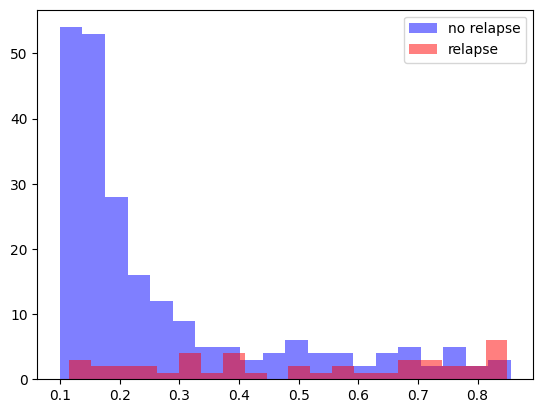

class: no relapse, fold: 1, mean: 0.3120577335357666, min: 0.08224377781152725, max: 0.8754751086235046
class: relapse, fold: 1, mean: 0.5591122508049011, min: 0.11529441922903061, max: 0.8794881701469421


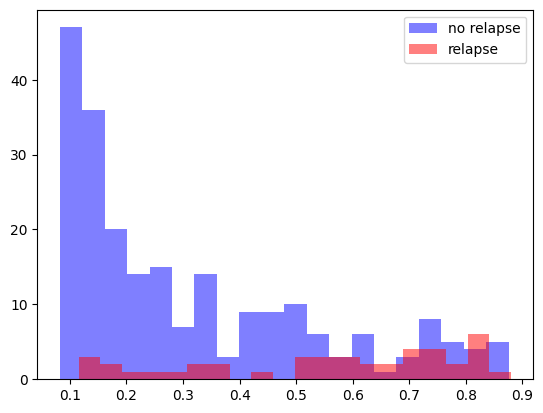

class: no relapse, fold: 2, mean: 0.27608728408813477, min: 0.04927805811166763, max: 0.8852384686470032
class: relapse, fold: 2, mean: 0.5256195068359375, min: 0.05844050645828247, max: 0.8984384536743164


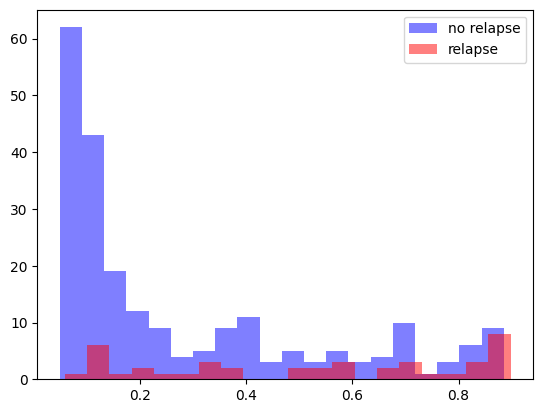

class: no relapse, fold: 3, mean: 0.26119905710220337, min: 0.06305690854787827, max: 0.8580365180969238
class: relapse, fold: 3, mean: 0.5581126809120178, min: 0.07356163114309311, max: 0.8616668581962585


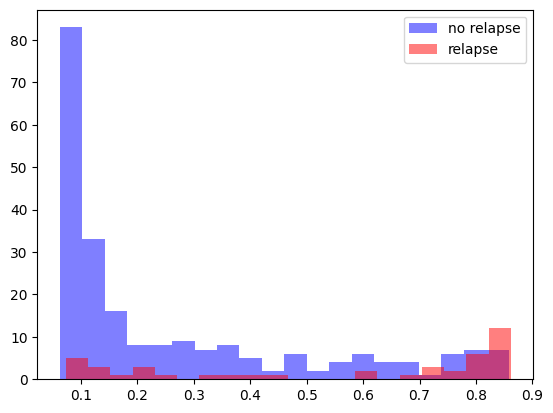

class: no relapse, fold: 4, mean: 0.2372623234987259, min: 0.046382706612348557, max: 0.8710315823554993
class: relapse, fold: 4, mean: 0.5866380929946899, min: 0.054854799062013626, max: 0.8748737573623657


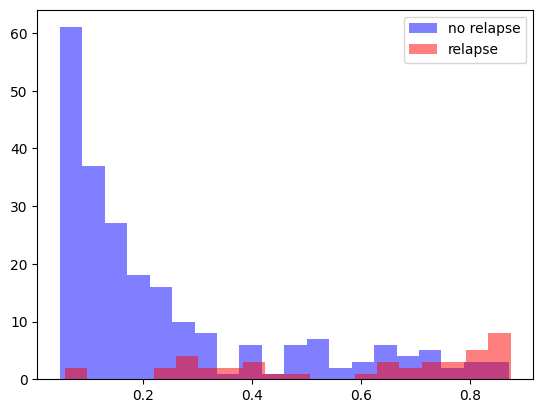

In [10]:
# plot hists of probabilities for class 0 and 1
# for each fold
# probs of class 1: results[fold_index]['data']['pac']['mean']
# gt: results[fold_index]['data']['gt']
# fold_index: 0, 1, 2, 3, 4
# class_index: 0, 1
# class_name: 'no relapse', 'relapse'
# class_color: 'blue', 'red'

for fold_index_test in range(5):
    for class_index in range(2):
        class_name = ['no relapse', 'relapse'][class_index]
        class_color = ['blue', 'red'][class_index]
        probs = \
            (results[fold_index_test]['data']['pac']['mean'])
        gt = results[fold_index_test]['data']['gt']
        plt.hist(probs[gt == class_index], bins=20, color=class_color, alpha=0.5, label=class_name)
        print(f'class: {class_name}, fold: {fold_index_test}, mean: {probs[gt == class_index].mean()}, min: {probs[gt == class_index].min()}, max: {probs[gt == class_index].max()}')
    plt.legend()
    plt.show()

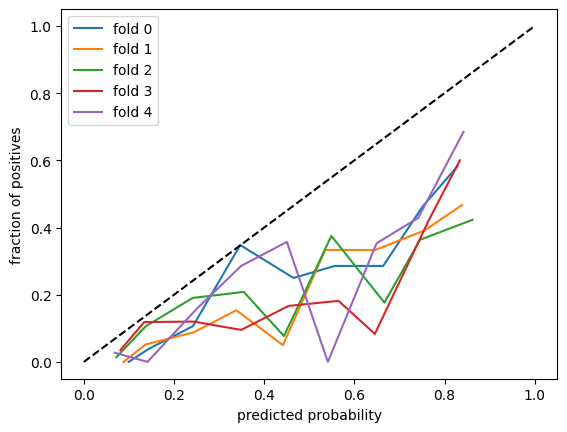

In [9]:
# plot calibration curves
# for each fold
# probs of class 1: results[fold_index]['data']['pac']['mean']
# gt: results[fold_index]['data']['gt']
# fold_index: 0, 1, 2, 3, 4
# class_index: 0, 1
# class_name: 'no relapse', 'relapse'
# class_color: 'blue', 'red'

from sklearn.calibration import calibration_curve


for fold_index_test in range(5):
    prob_true, prob_pred = calibration_curve(
        results[fold_index_test]['data']['gt'],
        results[fold_index_test]['data']['pac']['mean'],
        n_bins=10,
        strategy='uniform',
    )
    plt.plot(prob_pred, prob_true, label=f'fold {fold_index_test}')
plt.xlabel('predicted probability')
plt.ylabel('fraction of positives')
plt.legend()
plt.plot([0, 1], [0, 1], linestyle='--', color='black')